# *Preparation*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# 1. Load, explore & clean data

In [ ]:
clinical_data=pd.read_excel('/content/drive/MyDrive/HIDS_7009/7009_Project/TCGA_clinical_data/TCGA_GBM_LGG_clinical_data_for_task2_updated.xlsx')
clinical_data.head()

,Row.names,Disease_Type,Gender,Race
0,TCGA-02-0003,GBM,MALE,WHITE
1,TCGA-02-0006,GBM,FEMALE,UNKOWN
2,TCGA-02-0009,GBM,FEMALE,WHITE
3,TCGA-02-0011,GBM,FEMALE,WHITE
4,TCGA-02-0027,GBM,FEMALE,WHITE


In [ ]:
# Check number of disease
disease_counts = clinical_data['Disease_Type'].value_counts()
disease_counts

Disease_Type
GBM                  135
Oligodendroglioma     47
Astrocytoma           32
Oligoastrocytoma      28
Name: count, dtype: int64

In [ ]:
# Check number of gender values
gender_counts=clinical_data['Gender'].value_counts()
gender_counts

Gender
MALE            133
FEMALE          108
NOT_REPORTED      1
Name: count, dtype: int64

In [ ]:
# Check number of race values
race_counts=clinical_data['Race'].value_counts()
race_counts

Race
WHITE                        201
BLACK OR AFRICAN AMERICAN     18
UNKOWN                        11
[Unknown]                      7
ASIAN                          4
[Not Available]                1
Name: count, dtype: int64

In [ ]:
# import feature data
feature_data=pd.read_csv('/content/drive/MyDrive/HIDS_7009/7009_Project/TCGA_pyradiomics/TCGA pyRadiomics recalculated/TCGA_pyradiomics_t1.csv')
feature_data.head()

,ID,diagnostics_Configuration_EnabledImageTypes,diagnostics_Configuration_Settings,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Hash,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Size,diagnostics_Image-original_Spacing,...,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,Source
0,TCGA-02-0006,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,cf7eef9f6f12a01d6619c43bdd3c73682ea3cb1a,502.0,41.681753,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,18.357560,16.401219,19.026298,308.125,12.901075,0.280044,787.786220,2.556710,384.0,TCGA-GBM
1,TCGA-02-0009,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,2a6de38eb2a01829058381d08d359df1a627f4df,844.0,37.192602,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,31.048349,33.286634,36.249138,4240.375,21.857589,0.353025,3588.790560,0.846338,4349.0,TCGA-GBM
2,TCGA-02-0011,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,abd84417a8ec942a889872dfed222e0e1c56b5df,518.0,36.052124,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,92.763139,70.228199,104.278473,48177.250,52.467970,0.348870,18353.330279,0.380954,48610.0,TCGA-GBM
3,TCGA-02-0027,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,36b7a0b79122686dd0546bc3e79e2695d3118138,2474.0,177.964626,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,40.311289,47.010637,47.968740,7196.875,23.419801,0.398880,4519.303940,0.627954,7587.0,TCGA-GBM
4,TCGA-02-0033,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,9b8efeae3748d9049ab7982cac58a6c07b6b0477,880.0,35.767669,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,38.948684,38.910153,41.821047,7054.375,27.698853,0.493544,3604.103902,0.510903,7137.0,TCGA-GBM


In [ ]:
# merge tables
tcga_data=pd.merge(feature_data, clinical_data, left_on='ID',right_on='Row.names', how='inner')

In [ ]:
tcga_data.head()

,ID,diagnostics_Configuration_EnabledImageTypes,diagnostics_Configuration_Settings,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Hash,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Size,diagnostics_Image-original_Spacing,...,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,Source,Row.names,Disease_Type,Gender,Race
0,TCGA-02-0006,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,cf7eef9f6f12a01d6619c43bdd3c73682ea3cb1a,502.0,41.681753,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,12.901075,0.280044,787.786220,2.556710,384.0,TCGA-GBM,TCGA-02-0006,GBM,FEMALE,UNKOWN
1,TCGA-02-0009,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,2a6de38eb2a01829058381d08d359df1a627f4df,844.0,37.192602,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,21.857589,0.353025,3588.790560,0.846338,4349.0,TCGA-GBM,TCGA-02-0009,GBM,FEMALE,WHITE
2,TCGA-02-0011,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,abd84417a8ec942a889872dfed222e0e1c56b5df,518.0,36.052124,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,52.467970,0.348870,18353.330279,0.380954,48610.0,TCGA-GBM,TCGA-02-0011,GBM,FEMALE,WHITE
3,TCGA-02-0027,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,36b7a0b79122686dd0546bc3e79e2695d3118138,2474.0,177.964626,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,23.419801,0.398880,4519.303940,0.627954,7587.0,TCGA-GBM,TCGA-02-0027,GBM,FEMALE,WHITE
4,TCGA-02-0033,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,9b8efeae3748d9049ab7982cac58a6c07b6b0477,880.0,35.767669,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,27.698853,0.493544,3604.103902,0.510903,7137.0,TCGA-GBM,TCGA-02-0033,GBM,MALE,WHITE


In [ ]:
tcga_data.shape

(167, 135)

In [ ]:
# Check columns of feature data
columns_list = tcga_data.columns.tolist()
for column in columns_list:
    print(column)

ID
diagnostics_Configuration_EnabledImageTypes
diagnostics_Configuration_Settings
diagnostics_Image-original_Dimensionality
diagnostics_Image-original_Hash
diagnostics_Image-original_Maximum
diagnostics_Image-original_Mean
diagnostics_Image-original_Minimum
diagnostics_Image-original_Size
diagnostics_Image-original_Spacing
diagnostics_Mask-original_BoundingBox
diagnostics_Mask-original_CenterOfMass
diagnostics_Mask-original_CenterOfMassIndex
diagnostics_Mask-original_Hash
diagnostics_Mask-original_Size
diagnostics_Mask-original_Spacing
diagnostics_Mask-original_VolumeNum
diagnostics_Mask-original_VoxelNum
diagnostics_Versions_Numpy
diagnostics_Versions_PyRadiomics
diagnostics_Versions_PyWavelet
diagnostics_Versions_Python
diagnostics_Versions_SimpleITK
original_firstorder_10Percentile
original_firstorder_90Percentile
original_firstorder_Energy
original_firstorder_Entropy
original_firstorder_InterquartileRange
original_firstorder_Kurtosis
original_firstorder_Maximum
original_firstorder_

In [ ]:
# Drop unrelated columns
drop_columns=['diagnostics_Configuration_EnabledImageTypes',
              'diagnostics_Configuration_Settings',
              'diagnostics_Image-original_Dimensionality',
              'diagnostics_Image-original_Hash',
              'diagnostics_Image-original_Minimum',
              'diagnostics_Image-original_Size',
              'diagnostics_Image-original_Spacing',
              'diagnostics_Mask-original_BoundingBox',
              'diagnostics_Mask-original_CenterOfMass',
              'diagnostics_Mask-original_CenterOfMassIndex',
              'diagnostics_Mask-original_Hash',
              'diagnostics_Mask-original_Size',
              'diagnostics_Mask-original_Spacing',
              'diagnostics_Versions_Numpy',
              'diagnostics_Versions_PyRadiomics',
              'diagnostics_Versions_PyWavelet',
              'diagnostics_Versions_Python',
              'diagnostics_Versions_SimpleITK',
              'Source']

In [ ]:
tcga_data_final=tcga_data.drop(columns=drop_columns)
tcga_data_final


,ID,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_VoxelNum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,...,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,Row.names,Disease_Type,Gender,Race
0,TCGA-02-0006,502.0,41.681753,7,384,213.0,268.7,2.209929e+07,1.867801,31.0,...,308.125000,12.901075,0.280044,787.786220,2.556710,384.0,TCGA-02-0006,GBM,FEMALE,UNKOWN
1,TCGA-02-0009,844.0,37.192602,4,4349,246.0,291.0,3.119856e+08,1.669089,24.0,...,4240.375000,21.857589,0.353025,3588.790560,0.846338,4349.0,TCGA-02-0009,GBM,FEMALE,WHITE
2,TCGA-02-0011,518.0,36.052124,22,48610,181.0,236.0,2.151917e+09,1.866797,26.0,...,48177.250000,52.467970,0.348870,18353.330279,0.380954,48610.0,TCGA-02-0011,GBM,FEMALE,WHITE
3,TCGA-02-0027,2474.0,177.964626,77,7587,1082.0,1539.0,1.301408e+10,4.789586,225.0,...,7196.875000,23.419801,0.398880,4519.303940,0.627954,7587.0,TCGA-02-0027,GBM,FEMALE,WHITE
4,TCGA-02-0033,880.0,35.767669,9,7137,220.0,256.0,4.046741e+08,1.515616,16.0,...,7054.375000,27.698853,0.493544,3604.103902,0.510903,7137.0,TCGA-02-0033,GBM,MALE,WHITE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,TCGA-HT-8018,846.0,59.749816,1,8685,294.0,381.0,1.034732e+09,2.446766,36.0,...,8567.708333,27.600895,0.406857,4976.819900,0.580881,8685.0,TCGA-HT-8018,Oligoastrocytoma,FEMALE,WHITE
163,TCGA-HT-8111,2131.0,142.872744,16,437,610.6,710.0,1.895242e+08,2.671429,41.0,...,324.166667,19.867693,0.242972,939.231990,2.897374,437.0,TCGA-HT-8111,Oligoastrocytoma,MALE,WHITE
164,TCGA-HT-8114,1836.0,141.594406,6,168606,654.0,891.0,9.797585e+10,3.886156,112.0,...,168458.250000,63.763914,0.552147,26715.155008,0.158586,168606.0,TCGA-HT-8114,Oligoastrocytoma,MALE,WHITE
165,TCGA-HT-8563,2235.0,128.447085,27,1012,697.0,776.0,5.468699e+08,2.323453,41.0,...,672.291667,30.030643,0.161020,2304.851969,3.428351,1012.0,TCGA-HT-8563,Astrocytoma,FEMALE,WHITE


In [ ]:
# Check columns of final data
columns_list_final = tcga_data_final.columns.tolist()
for column in columns_list_final:
    print(column)



ID
diagnostics_Image-original_Maximum
diagnostics_Image-original_Mean
diagnostics_Mask-original_VolumeNum
diagnostics_Mask-original_VoxelNum
original_firstorder_10Percentile
original_firstorder_90Percentile
original_firstorder_Energy
original_firstorder_Entropy
original_firstorder_InterquartileRange
original_firstorder_Kurtosis
original_firstorder_Maximum
original_firstorder_Mean
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Median
original_firstorder_Minimum
original_firstorder_Range
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_RootMeanSquared
original_firstorder_Skewness
original_firstorder_TotalEnergy
original_firstorder_Uniformity
original_firstorder_Variance
original_glcm_Autocorrelation
original_glcm_ClusterProminence
original_glcm_ClusterShade
original_glcm_ClusterTendency
original_glcm_Contrast
original_glcm_Correlation
original_glcm_DifferenceAverage
original_glcm_DifferenceEntropy
original_glcm_DifferenceVariance
original_glcm_Id
origina

In [ ]:
# Check for missing data
missing_total = tcga_data_final.isnull().sum().sum()
missing_total


0

# 2. Data preprocessing (scaling, labeling)

In [ ]:
# Drop oligoastrocytoma data
tcga_data_final_filtered=tcga_data_final[tcga_data_final['Disease_Type']!='Oligoastrocytoma']
disease_counts_filtered = tcga_data_final_filtered['Disease_Type'].value_counts()
disease_counts_filtered

Disease_Type
GBM                  102
Oligodendroglioma     26
Astrocytoma           21
Name: count, dtype: int64

In [ ]:
tcga_data_final_filtered.shape
# final: 149 samples for analysis

(149, 116)

In [ ]:
# First change outcome value using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
tcga_before_encodring=tcga_data_final_filtered['Disease_Type']
tcga_data_final_filtered['Disease_Type'] = label_encoder.fit_transform(tcga_data_final_filtered['Disease_Type'])

tcga_data_final_filtered['Disease_Type']

<ipython-input-18-1b539503b82d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcga_data_final_filtered['Disease_Type'] = label_encoder.fit_transform(tcga_data_final_filtered['Disease_Type'])


0      1
1      1
2      1
3      1
4      1
      ..
157    0
159    2
161    0
165    0
166    2
Name: Disease_Type, Length: 149, dtype: int64

In [ ]:
disease_type_mapping = {disease_type: encoded_label for disease_type, encoded_label in zip(tcga_before_encodring, tcga_data_final_filtered['Disease_Type'])}

print("Disease Type Mapping:")
for disease_type, encoded_label in disease_type_mapping.items():
    print(f"{disease_type}: {encoded_label}")

Disease Type Mapping:
GBM: 1
Astrocytoma: 0
Oligodendroglioma: 2


In [ ]:
# Next split into train and test set & scale data

X =tcga_data_final_filtered.drop(columns=['ID','Row.names','Gender','Race', 'Disease_Type'])
y=tcga_data_final_filtered['Disease_Type']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_columns=tcga_data_final_filtered.columns
X_train_columns
values_to_remove = ['ID', 'Row.names','Disease_Type','Gender','Race']  # List of values to remove
result_list = [x for x in X_train_columns if x not in values_to_remove]


In [ ]:
X_train_df = pd.DataFrame(X_train, columns=result_list)
X_train_df.shape

(119, 111)

In [ ]:
X_test_df = pd.DataFrame(X_test, columns=result_list)
X_test_df.shape

(30, 111)

In [ ]:
# Check transformed data
X_train_scaled


array([[-0.30772896, -0.3289896 ,  1.67918434, ..., -0.34211382,
        -0.42769819, -0.31601129],
       [ 0.91927493,  1.52420258, -0.26941659, ...,  0.49730421,
        -0.32324981, -0.00688393],
       [-0.21930562, -0.32745636, -0.8479075 , ..., -0.89910671,
        -0.1708174 , -0.72776893],
       ...,
       [ 0.05307295,  0.22247669, -0.63477927, ..., -0.87662551,
        -0.2425074 , -0.70727379],
       [-0.21098342, -0.21264457, -0.90880128, ..., -1.09384006,
         0.62021006, -0.80378335],
       [ 0.23858858,  0.11797664, -0.96969506, ..., -0.55174275,
        -0.61781049, -0.08840081]])

In [ ]:
X_test_scaled

array([[-0.31119654, -0.34839605,  0.46130876, ..., -0.61966724,
         0.0221335 , -0.66439782],
       [ 0.86431375,  1.02861413, -0.96969506, ...,  0.2820003 ,
        -0.55334009,  0.52017822],
       [-0.31709143, -0.36182858, -0.96969506, ...,  0.36065599,
        -0.60352418,  0.96161209],
       ...,
       [ 0.16160826,  0.13494289, -0.48254482, ..., -0.6836062 ,
         0.53268345, -0.72507952],
       [-0.12966863, -0.07726606,  0.00460541, ..., -0.73614211,
        -0.04491022, -0.68344007],
       [-0.16087686, -0.05362241, -0.87835439, ..., -0.92748729,
        -0.00510599, -0.75209725]])

In [ ]:
# Change variable names
X_test=X_test_scaled
X_train=X_train_scaled

In [ ]:
import numpy as np
np.unique(y_train)

array([0, 1, 2])

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Oversample the minority class using SMOTE
#smote = SMOTE(random_state=42)
sampler_tomek = SMOTETomek(random_state=42)
sampler_enn = SMOTEENN(random_state=42)
sampler_borderline = BorderlineSMOTE(random_state=42)
random_oversampler = RandomOverSampler(random_state=42)
smote_oversampler = SMOTE(random_state=42)
adasyn_sampler = ADASYN(random_state=42)

X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)
#X_resampled, y_resampled = adasyn_sampler.fit_resample(X_resampled, y_resampled)

# Print class distribution after resampling with SMOTE
print("\nClass Distribution after Resampling with SMOTE:")
print(Counter(y_resampled))


Class Distribution after Resampling with SMOTE:
Counter({1: 82, 2: 82, 0: 82})


# 3. Model training, Hyperparameter tuning, Performance Evaluation

In [ ]:
# Define function for model fit, cross validation and showing performance results
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def fit_and_cross_validate(model, X_train, y_train, X_test, y_test, cv=10):
    model.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print("Cross-validated Accuracy on Training Data: {:.2f}".format(cv_scores.mean()))

    y_pred_test = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print("Accuracy on Test Data: {:.2f}".format(test_accuracy))

    print("Classification Report on Test Data:")
    print(classification_report(y_test, y_pred_test))

 ## 1) SVM

In [ ]:
# Initial evaluation (original)
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_classifier = SVC()

fit_and_cross_validate(svm_classifier, X_train, y_train, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.75
Accuracy on Test Data: 0.70
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.79      0.95      0.86        20
           2       0.50      0.29      0.36         7

    accuracy                           0.70        30
   macro avg       0.43      0.41      0.41        30
weighted avg       0.64      0.70      0.66        30



In [ ]:
# Initial evaluation (after imbalance adjustment)
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_classifier = SVC()

fit_and_cross_validate(svm_classifier, X_resampled, y_resampled, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.81
Accuracy on Test Data: 0.67
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.12      0.33      0.18         3
           1       0.94      0.80      0.86        20
           2       0.60      0.43      0.50         7

    accuracy                           0.67        30
   macro avg       0.56      0.52      0.52        30
weighted avg       0.78      0.67      0.71        30



In [ ]:
joblib.dump(svm_classifier, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_svm_classifier.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_svm_classifier.pkl']

In [ ]:
# Hyperparameter tuning & performance evaluation (SVM) (original without scaling)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_classifier = SVC()

param_grid = {
    'C': [0.01, 0.1, 1],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto', 0.01, 0.1,],  # Kernel coefficient
    'class_weight': [{0: 10, 1: 5, 2: 10}, {0: 10, 1: 5, 2: 5},{0: 10, 1: 1, 2: 3}]
}
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_svm_classifier = grid_search.best_estimator_
y_pred = best_svm_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Parameters: {'C': 1, 'class_weight': {0: 10, 1: 5, 2: 5}, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.7568181818181818
              precision    recall  f1-score   support

           0       0.14      0.33      0.20         3
           1       0.90      0.90      0.90        20
           2       0.67      0.29      0.40         7

    accuracy                           0.70        30
   macro avg       0.57      0.51      0.50        30
weighted avg       0.77      0.70      0.71        30



In [ ]:
# Hyperparameter tuning & performance evaluation (SVM)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

best_svm_classifier = SVC()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]  # Kernel coefficient

}
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_svm_classifier = grid_search.best_estimator_
y_pred = best_svm_classifier.predict(X_test)

print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.939265306122449
              precision    recall  f1-score   support

           0       0.20      0.67      0.31         3
           1       0.94      0.75      0.83        20
           2       0.75      0.43      0.55         7

    accuracy                           0.67        30
   macro avg       0.63      0.62      0.56        30
weighted avg       0.82      0.67      0.71        30



In [ ]:
!pip install joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(best_svm_classifier, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_svm_classifier.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_svm_classifier.pkl']

## 2) Random Forest

In [ ]:
# Initial evaluation
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

fit_and_cross_validate(rf_classifier, X_train, y_train, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.76
Accuracy on Test Data: 0.70
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.78      0.90      0.84        20
           2       0.50      0.43      0.46         7

    accuracy                           0.70        30
   macro avg       0.43      0.44      0.43        30
weighted avg       0.64      0.70      0.67        30



In [ ]:
# Initial evaluation (imbalance adjustment)
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

fit_and_cross_validate(rf_classifier, X_resampled, y_resampled, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.94
Accuracy on Test Data: 0.67
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.85      0.85      0.85        20
           2       0.50      0.43      0.46         7

    accuracy                           0.67        30
   macro avg       0.45      0.43      0.44        30
weighted avg       0.68      0.67      0.67        30



In [ ]:
joblib.dump(rf_classifier, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_rf_classifier.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_rf_classifier.pkl']

In [ ]:
# Hyperparameter tuning & performance evaluation (Random Forest)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.7807971014492753
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.77      0.85      0.81        20
           2       0.50      0.43      0.46         7

    accuracy                           0.70        30
   macro avg       0.59      0.54      0.56        30
weighted avg       0.68      0.70      0.69        30



In [ ]:
# Hyperparameter tuning & performance evaluation (Random Forest)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9269387755102041
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.90      0.90      0.90        20
           2       0.50      0.43      0.46         7

    accuracy                           0.70        30
   macro avg       0.47      0.44      0.45        30
weighted avg       0.72      0.70      0.71        30



## 3) XGBoost

In [ ]:
# Initial evaluation
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()
fit_and_cross_validate(xgb_classifier, X_train, y_train, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.80
Accuracy on Test Data: 0.70
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.95      0.90      0.92        20
           2       0.43      0.43      0.43         7

    accuracy                           0.70        30
   macro avg       0.46      0.44      0.45        30
weighted avg       0.73      0.70      0.72        30



In [ ]:
# With imbalanced data adjustment
xgb_classifier = xgb.XGBClassifier()
fit_and_cross_validate(xgb_classifier, X_resampled, y_resampled, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.95
Accuracy on Test Data: 0.73
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.89      0.85      0.87        20
           2       0.60      0.43      0.50         7

    accuracy                           0.73        30
   macro avg       0.61      0.65      0.61        30
weighted avg       0.77      0.73      0.74        30



In [ ]:
import joblib
joblib.dump(xgb_classifier, '/content/drive/MyDrive/HIDS_7009/7009_Project/xgb_classifier.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/xgb_classifier.pkl']

In [ ]:
# Hyperparameter tuning & performance evaluation (XGB) --> Best performing

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 8],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.5, 1],
    'colsample_bytree': [0.5, 1],
    'class_weight': [{0: 10, 1: 5, 2: 10}, {0: 10, 1: 5, 2: 5},{0: 10, 1: 1, 2: 3}]
}

grid_search = GridSearchCV(estimator=xgb_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train) # use original data for xgb

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:43:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'class_weight': {0: 10, 1: 5, 2: 10}, 'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}
Best Score: 0.8065217391304348
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.90      0.90      0.90        20
           2       0.57      0.57      0.57         7

    accuracy                           0.77        30
   macro avg       0.60      0.60      0.60        30
weighted avg       0.77      0.77      0.77        30



In [ ]:
joblib.dump(best_xgb_model, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_xgb_classifier.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_xgb_classifier.pkl']

In [ ]:
# Hyperparameter tuning & performance evaluation (XGB): imbalance adjsuted --> Best performing

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 8],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.5, 1],
    'colsample_bytree': [0.5, 1],
    'class_weight': [{0: 10, 1: 5, 2: 10}, {0: 10, 1: 5, 2: 5},{0: 10, 1: 1, 2: 3}]
}

grid_search = GridSearchCV(estimator=xgb_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_resampled, y_resampled) # use original data for xgb

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_xgb_model_balanced = grid_search.best_estimator_
y_pred = best_xgb_model_balanced.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:29:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'class_weight': {0: 10, 1: 5, 2: 10}, 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}
Best Score: 0.9593469387755101
              precision    recall  f1-score   support

           0       0.14      0.33      0.20         3
           1       1.00      0.80      0.89        20
           2       0.57      0.57      0.57         7

    accuracy                           0.70        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.81      0.70      0.75        30



In [ ]:
# Save as a file.
from google.colab import drive
import joblib

drive.mount('/content/drive')

# Define the file path where you want to save the model
model_file_path = '/content/drive/MyDrive/HIDS_7009/7009_Project/best_xgb_model.joblib'

# Save the best XGBoost model to Google Drive
joblib.dump(best_xgb_model, model_file_path)

print("Model saved to Google Drive:", model_file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to Google Drive: /content/drive/MyDrive/HIDS_7009/7009_Project/best_xgb_model.joblib


## 4) Convolutional Neural Network (CNN)

In [ ]:
pip install keras

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Convert y_resampled to a NumPy array (if necessary)
y_resampled_array = np.array(y_resampled)

# Create a OneHotEncoder object
encoder = OneHotEncoder()

# Fit the encoder to the unique categories in y_resampled_array
encoder.fit(y_resampled_array.reshape(-1, 1))

# Transform y_resampled_array into a one-hot encoded NumPy array
y_resampled_one_hot = encoder.transform(y_resampled_array.reshape(-1, 1)).toarray()


In [ ]:
input_shape = X_resampled.shape[1:]
input_shape

(111,)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical

# Assuming X_resampled and y_resampled are your resampled training data
# and X_test, y_test are your test data

# Convert labels to one-hot encoded format
y_resampled_onehot = to_categorical(y_resampled)
y_test_onehot = to_categorical(y_test)

# Define CNN model
model = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=(111,1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Assuming num_classes is the number of classes
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, val_index in skf.split(X_resampled, y_resampled):
    X_train_fold, X_val_fold = X_resampled[train_index], X_resampled[val_index]
    y_train_fold, y_val_fold = y_resampled_onehot[train_index], y_resampled_onehot[val_index]

    # Train model on the fold
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=1)

    # Evaluate model on validation fold
    val_loss, val_acc = model.evaluate(X_val_fold, y_val_fold)
    print("Validation Accuracy:", val_acc)

# Train model on the entire resampled dataset
model.fit(X_resampled, y_resampled_onehot, epochs=10, batch_size=32, verbose=1)

# Evaluate model on test set
y_pred_test = model.predict(X_test)

# Convert predictions back to labels
y_pred_test_labels = np.argmax(y_pred_test, axis=1)

# Generate classification report for test set
report = classification_report(y_test, y_pred_test_labels)
print("Classification Report on Test Set:")
print(report)



Epoch 1/10
7/7 [==============================] - 5s 36ms/step - loss: 0.9895 - accuracy: 0.5051
Epoch 2/10
7/7 [==============================] - 0s 32ms/step - loss: 0.8311 - accuracy: 0.5969
Epoch 3/10
7/7 [==============================] - 0s 32ms/step - loss: 0.6990 - accuracy: 0.6684
Epoch 4/10
7/7 [==============================] - 0s 32ms/step - loss: 0.5801 - accuracy: 0.7908
Epoch 5/10
7/7 [==============================] - 0s 25ms/step - loss: 0.5054 - accuracy: 0.7959
Epoch 6/10
7/7 [==============================] - 0s 31ms/step - loss: 0.4501 - accuracy: 0.8316
Epoch 7/10
7/7 [==============================] - 0s 30ms/step - loss: 0.4329 - accuracy: 0.7959
Epoch 8/10
7/7 [==============================] - 0s 33ms/step - loss: 0.4000 - accuracy: 0.8265
Epoch 9/10
7/7 [==============================] - 0s 39ms/step - loss: 0.3201 - accuracy: 0.8827
Epoch 10/10
2/2 [==============================] - 1s 16ms/step - loss: 0.4615 - accuracy: 0.8600
Validation Accuracy: 0.860000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5) KNN

In [ ]:
# KNN --> Best performing
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

fit_and_cross_validate(knn_classifier, X_train, y_train, X_test, y_test)

# joblib.dump(knn_classifier, '/content/drive/MyDrive/HIDS_7009/7009_Project/knn_classifier_trained.pkl')


Cross-validated Accuracy on Training Data: 0.76
Accuracy on Test Data: 0.73
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.79      0.95      0.86        20
           2       1.00      0.29      0.44         7

    accuracy                           0.73        30
   macro avg       0.68      0.52      0.53        30
weighted avg       0.79      0.73      0.71        30



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier_scaled = KNeighborsClassifier()

fit_and_cross_validate(knn_classifier_scaled, X_resampled, y_resampled, X_test, y_test)

joblib.dump(knn_classifier_scaled, '/content/drive/MyDrive/HIDS_7009/7009_Project/knn_classifier_scaled.pkl')

Cross-validated Accuracy on Training Data: 0.83
Accuracy on Test Data: 0.43
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.91      0.50      0.65        20
           2       0.25      0.43      0.32         7

    accuracy                           0.43        30
   macro avg       0.39      0.31      0.32        30
weighted avg       0.66      0.43      0.50        30



['/content/drive/MyDrive/HIDS_7009/7009_Project/knn_classifier_scaled.pkl']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Define KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get best KNeighborsClassifier model
best_knn_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_knn_model.predict(X_test)

# Generate classification report for test set
print(classification_report(y_test, y_pred))




Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Best Score: 0.7648550724637682
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.79      0.95      0.86        20
           2       1.00      0.29      0.44         7

    accuracy                           0.73        30
   macro avg       0.68      0.52      0.53        30
weighted avg       0.79      0.73      0.71        30



In [ ]:
joblib.dump(best_knn_model, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_knn_classifier.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_knn_classifier.pkl']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Define KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get best KNeighborsClassifier model
best_knn_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_knn_model.predict(X_test)

# Generate classification report for test set
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Best Score: 0.8576326530612244
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.91      0.50      0.65        20
           2       0.31      0.57      0.40         7

    accuracy                           0.47        30
   macro avg       0.41      0.36      0.35        30
weighted avg       0.68      0.47      0.52        30



## 6) Decision Tree

In [ ]:
# Decision Tree --> Best performing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_classifier = DecisionTreeClassifier(class_weight={0: 1, 1: 1, 2: 10})

fit_and_cross_validate(dt_classifier, X_train, y_train, X_test, y_test)



Cross-validated Accuracy on Training Data: 0.68
Accuracy on Test Data: 0.67
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.88      0.75      0.81        20
           2       0.50      0.43      0.46         7

    accuracy                           0.67        30
   macro avg       0.56      0.62      0.56        30
weighted avg       0.73      0.67      0.69        30



In [ ]:
import joblib
joblib.dump(dt_classifier, '/content/drive/MyDrive/HIDS_7009/7009_Project/dt_classifier_trained.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/dt_classifier_trained.pkl']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(class_weight={0: 10, 1: 1, 2: 30})

fit_and_cross_validate(dt_classifier, X_resampled, y_resampled, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.80
Accuracy on Test Data: 0.67
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.25      0.67      0.36         3
           1       0.84      0.80      0.82        20
           2       0.67      0.29      0.40         7

    accuracy                           0.67        30
   macro avg       0.59      0.58      0.53        30
weighted avg       0.74      0.67      0.68        30



In [ ]:
joblib.dump(dt_classifier, '/content/drive/MyDrive/HIDS_7009/7009_Project/dt_classifier_trained.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/dt_classifier_trained.pkl']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':['sqrt','log2'],
    'class_weight':[{0: 20, 1: 5, 2: 10}]
}

dt_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_dt_model = grid_search.best_estimator_

y_pred = best_dt_model.predict(X_test)

print(classification_report(y_test, y_pred))


Best Parameters: {'class_weight': {0: 20, 1: 5, 2: 10}, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.738768115942029
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.83      0.75      0.79        20
           2       0.43      0.43      0.43         7

    accuracy                           0.60        30
   macro avg       0.42      0.39      0.41        30
weighted avg       0.66      0.60      0.63        30



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':['sqrt','log2'],
    'class_weight':[{0: 20, 1: 5, 2: 10}]
}

dt_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_dt_model = grid_search.best_estimator_

y_pred = best_dt_model.predict(X_test)

print(classification_report(y_test, y_pred))


Best Parameters: {'class_weight': {0: 20, 1: 5, 2: 10}, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.8104352704661274
              precision    recall  f1-score   support

           0       0.12      0.33      0.18         3
           1       0.74      0.70      0.72        20
           2       0.67      0.29      0.40         7

    accuracy                           0.57        30
   macro avg       0.51      0.44      0.43        30
weighted avg       0.66      0.57      0.59        30



# 4. Feature importance

In [ ]:
# Define function for feature importance visualization

import matplotlib.pyplot as plt

def plot_feature_importance(feature_importance, feature_names, top_n=10):
    # Sort feature importance in descending order
    sorted_indices = feature_importance.argsort()[::-1]
    sorted_feature_importance = feature_importance[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]

    # Select top_n features
    top_n_importance = sorted_feature_importance[:top_n]
    top_n_names = sorted_feature_names[:top_n]

    # Plot top_n feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(range(top_n), top_n_importance, align='center')
    plt.xticks(range(top_n), top_n_names, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Top {} Feature Importance'.format(top_n))
    plt.show()


In [ ]:
def plot_feature_importance_2(feature_importance, feature_names, top_n=10):
    # Sort feature importance in descending order
    sorted_indices = feature_importance.argsort()[::-1]
    sorted_feature_importance = feature_importance[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]

    # Select top_n features
    top_n_importance = sorted_feature_importance[:top_n]
    top_n_names = sorted_feature_names[:top_n]

    # Plot top_n feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(range(top_n), top_n_importance, align='center')
    plt.xticks(range(top_n), top_n_names, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Top {} Feature Importance'.format(top_n))
    plt.show()

    # Create a DataFrame for the top_n features
    feature_importance_df = pd.DataFrame({'Feature': top_n_names, 'Importance': top_n_importance})

    # Display the DataFrame
    print("Top {} Feature Importance Table:".format(top_n))
    print(feature_importance_df)

1) Random Forest

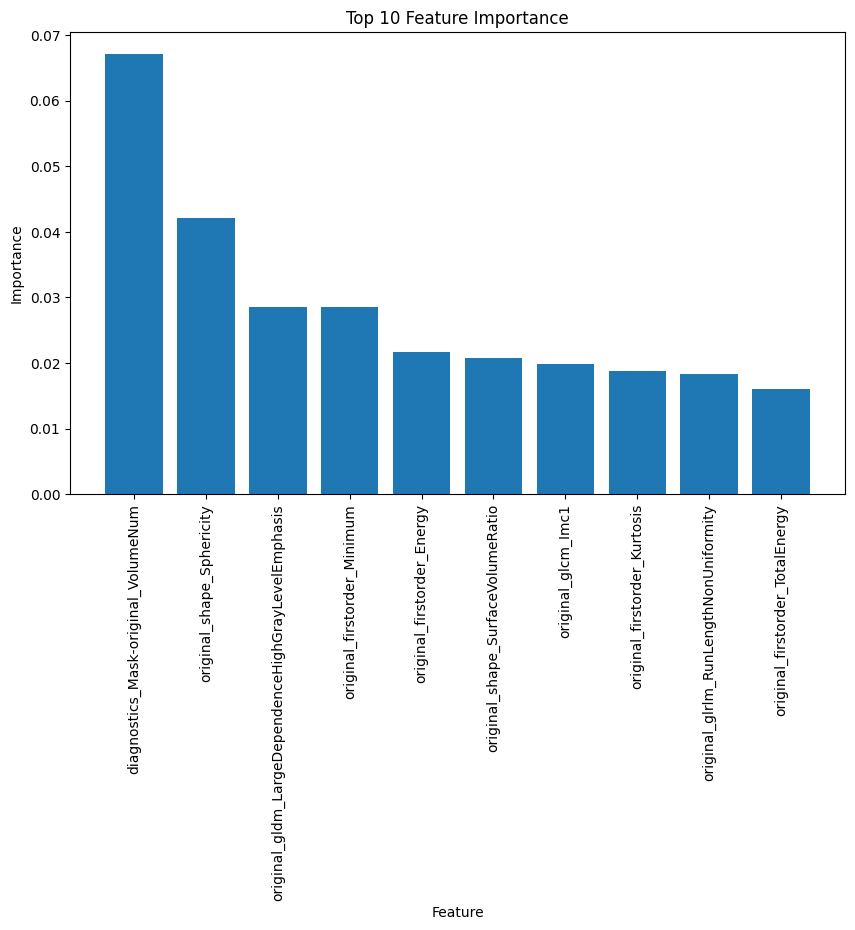

In [ ]:
feature_importance_rf = rf_classifier.feature_importances_
plot_feature_importance(feature_importance_rf, X_train_df.columns)


2) XGB Classifier

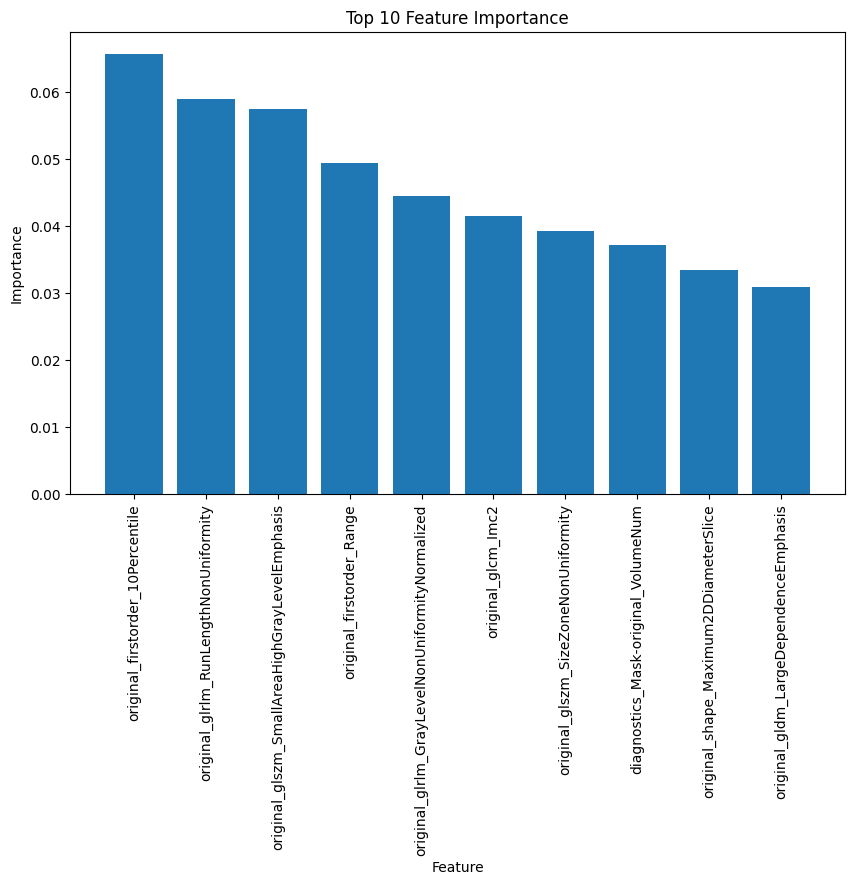

Top 10 Feature Importance Table:
                                           Feature  Importance
0                 original_firstorder_10Percentile    0.065642
1            original_glrlm_RunLengthNonUniformity    0.058992
2    original_glszm_SmallAreaHighGrayLevelEmphasis    0.057510
3                        original_firstorder_Range    0.049390
4  original_glrlm_GrayLevelNonUniformityNormalized    0.044490
5                               original_glcm_Imc2    0.041504
6             original_glszm_SizeZoneNonUniformity    0.039253
7              diagnostics_Mask-original_VolumeNum    0.037242
8            original_shape_Maximum2DDiameterSlice    0.033384
9            original_gldm_LargeDependenceEmphasis    0.030980


In [ ]:
feature_importance_xgb = xgb_classifier.feature_importances_
plot_feature_importance_2(feature_importance_xgb, X_train_df.columns)

3) Decision Tree

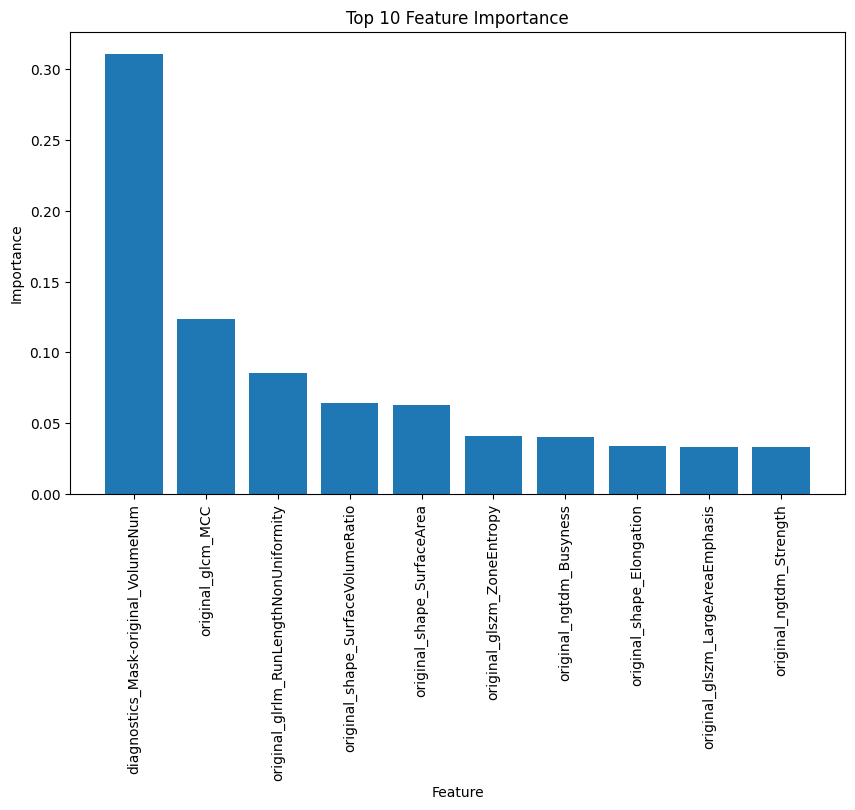

Top 10 Feature Importance Table:
                                 Feature  Importance
0    diagnostics_Mask-original_VolumeNum    0.311043
1                      original_glcm_MCC    0.123371
2  original_glrlm_RunLengthNonUniformity    0.085497
3      original_shape_SurfaceVolumeRatio    0.064514
4             original_shape_SurfaceArea    0.062978
5             original_glszm_ZoneEntropy    0.041124
6                original_ngtdm_Busyness    0.039902
7              original_shape_Elongation    0.033524
8       original_glszm_LargeAreaEmphasis    0.032899
9                original_ngtdm_Strength    0.032768


In [ ]:
feature_importance_dt = dt_classifier.feature_importances_
plot_feature_importance_2(feature_importance_dt, X_train_df.columns)

# 5. Further model training

## 1) Random Forest

In [ ]:
feature_indices = np.argsort(feature_importance_rf)[::-1]  # Sort indices by importance (descending order)

# Select top 30 features
top_30_feature_indices = feature_indices[:30]
top_30_features = X_train_df.columns[top_30_feature_indices]

# Extract top 30 features from the training data
X_train_top_30 = X_train[:, top_30_feature_indices]
X_test_top_30 = X_test[:, top_30_feature_indices]

rf_classifier_top30 = RandomForestClassifier()

fit_and_cross_validate(rf_classifier_top30, X_train_top_30, y_train, X_test_top_30, y_test)

Cross-validated Accuracy on Training Data: 0.77
Accuracy on Test Data: 0.73
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.86      0.90      0.88        20
           2       0.60      0.43      0.50         7

    accuracy                           0.73        30
   macro avg       0.57      0.55      0.55        30
weighted avg       0.74      0.73      0.73        30



In [ ]:
folder_path='/content/drive/MyDrive/HIDS_7009/7009_Project'
file_path = folder_path + '/top_30_features_rf.txt'
with open(file_path, 'w') as f:
    for feature in top_30_features:
        f.write(feature + '\n')

In [ ]:


# Extract top 30 features from the training data
X_train_resampled_top_30 = X_resampled[:, top_30_feature_indices]
X_test_top_30 = X_test[:, top_30_feature_indices]

rf_classifier_top30 = RandomForestClassifier()

fit_and_cross_validate(rf_classifier_top30, X_train_resampled_top_30, y_resampled, X_test_top_30, y_test)

Cross-validated Accuracy on Training Data: 0.94
Accuracy on Test Data: 0.80
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.95      0.90      0.92        20
           2       0.67      0.57      0.62         7

    accuracy                           0.80        30
   macro avg       0.67      0.71      0.68        30
weighted avg       0.83      0.80      0.81        30



In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train_resampled_top_30, y_resampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_rf_classifier_top30 = grid_search.best_estimator_
y_pred = best_rf_classifier_top30.predict(X_test_top_30)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9390204081632654
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.90      0.90      0.90        20
           2       0.67      0.57      0.62         7

    accuracy                           0.80        30
   macro avg       0.69      0.71      0.70        30
weighted avg       0.81      0.80      0.80        30



In [ ]:
joblib.dump(best_rf_classifier_top30, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_rf_classifier.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_rf_classifier.pkl']

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Indices of top 30 features:", top_30_feature_indices)

Shape of X_train: (119, 111)
Indices of top 30 features: [  2 107  19 109   6  69  14   9  68   4  86  35  54  93  76  27 103  99
 104 101  85   5  65  47  41   3  17  60  36 108]


## 2) XGBoost

In [ ]:
feature_indices = np.argsort(feature_importance_xgb)[::-1]  # Sort indices by importance (descending order)

# Select top 30 features
top_50_feature_indices_xgb = feature_indices[:50]
top_50_features_xgb = X_train_df.columns[top_50_feature_indices_xgb]

# Extract top 30 features from the training data
X_train_top_50_xgb = X_train[:, top_50_feature_indices_xgb]
X_test_top_50_xgb = X_test[:, top_50_feature_indices_xgb]


In [ ]:
folder_path='/content/drive/MyDrive/HIDS_7009/7009_Project'
file_path = folder_path + '/top_50_features_xgb.txt'
with open(file_path, 'w') as f:
    for feature in top_50_features_xgb:
        f.write(feature + '\n')

In [ ]:
xgb_classifier_top50 = xgb.XGBClassifier()

fit_and_cross_validate(xgb_classifier_top50, X_train_top_50_xgb, y_train, X_test_top_50_xgb, y_test)

Cross-validated Accuracy on Training Data: 0.82
Accuracy on Test Data: 0.70
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.94      0.80      0.86        20
           2       0.50      0.43      0.46         7

    accuracy                           0.70        30
   macro avg       0.58      0.63      0.58        30
weighted avg       0.77      0.70      0.72        30



In [ ]:

joblib.dump(xgb_classifier_top50, '/content/drive/MyDrive/HIDS_7009/7009_Project/xgb_classifier_top50.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/xgb_classifier_top50.pkl']

In [ ]:
X_train_resampled_top_50_xgb = X_resampled[:, top_50_feature_indices_xgb]
X_test_top_50_xgb = X_test[:, top_50_feature_indices_xgb]


fit_and_cross_validate(xgb_classifier_top50, X_train_resampled_top_50_xgb, y_resampled, X_test_top_50_xgb, y_test)

Cross-validated Accuracy on Training Data: 0.93
Accuracy on Test Data: 0.63
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.93      0.70      0.80        20
           2       0.45      0.71      0.56         7

    accuracy                           0.63        30
   macro avg       0.46      0.47      0.45        30
weighted avg       0.73      0.63      0.66        30



In [ ]:

joblib.dump(xgb_classifier_top50, '/content/drive/MyDrive/HIDS_7009/7009_Project/xgb_classifier_top50_resampled.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/xgb_classifier_top50_resampled.pkl']

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 8],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.5, 1],
    'colsample_bytree': [0.5, 1],
    'class_weight': [{0: 10, 1: 5, 2: 10}, {0: 10, 1: 5, 2: 5},{0: 10, 1: 1, 2: 3}]
}

grid_search = GridSearchCV(estimator=xgb_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train_resampled_top_30_xgb, y_resampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_xgb_model_balanced_top30 = grid_search.best_estimator_
y_pred = best_xgb_model_balanced_top30.predict(X_test_top_30_xgb)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:12:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'class_weight': {0: 10, 1: 5, 2: 10}, 'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 1}
Best Score: 0.9351020408163265
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.87      0.65      0.74        20
           2       0.30      0.43      0.35         7

    accuracy                           0.53        30
   macro avg       0.39      0.36      0.37        30
weighted avg       0.65      0.53      0.58        30



## 3) Decision Tree


In [ ]:
# Following is RF model done with dt-top 30
feature_indices_dt = np.argsort(feature_importance_dt)[::-1]  # Sort indices by importance (descending order)

# Select top 30 features
top_30_feature_indices_dt = feature_indices_dt[:30]
top_30_features_dt = X_train_df.columns[top_30_feature_indices_dt]

# Extract top 30 features from the training data
X_train_top_30_dt = X_train[:, top_30_feature_indices_dt]
X_test_top_30_dt = X_test[:, top_30_feature_indices_dt]

dt_classifier_top30 = RandomForestClassifier()

fit_and_cross_validate(dt_classifier_top30, X_train_top_30_dt, y_train, X_test_top_30_dt, y_test)

NameError: name 'feature_importance_dt' is not defined

In [ ]:
X_train

array([[-0.30772896, -0.3289896 ,  1.67918434, ..., -0.34211382,
        -0.42769819, -0.31601129],
       [ 0.91927493,  1.52420258, -0.26941659, ...,  0.49730421,
        -0.32324981, -0.00688393],
       [-0.21930562, -0.32745636, -0.8479075 , ..., -0.89910671,
        -0.1708174 , -0.72776893],
       ...,
       [ 0.05307295,  0.22247669, -0.63477927, ..., -0.87662551,
        -0.2425074 , -0.70727379],
       [-0.21098342, -0.21264457, -0.90880128, ..., -1.09384006,
         0.62021006, -0.80378335],
       [ 0.23858858,  0.11797664, -0.96969506, ..., -0.55174275,
        -0.61781049, -0.08840081]])

In [ ]:
columns_list_final

['ID',
 'diagnostics_Image-original_Maximum',
 'diagnostics_Image-original_Mean',
 'diagnostics_Mask-original_VolumeNum',
 'diagnostics_Mask-original_VoxelNum',
 'original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_Mean',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Median',
 'original_firstorder_Minimum',
 'original_firstorder_Range',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_RootMeanSquared',
 'original_firstorder_Skewness',
 'original_firstorder_TotalEnergy',
 'original_firstorder_Uniformity',
 'original_firstorder_Variance',
 'original_glcm_Autocorrelation',
 'original_glcm_ClusterProminence',
 'original_glcm_ClusterShade',
 'original_glcm_ClusterTendency',
 'original_glcm_Contrast',
 'original_glcm_Correlation',
 'ori

In [ ]:
X_train_df=pd.DataFrame(X_train)
X_train_df

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,-0.307729,-0.328990,1.679184,-0.316011,-0.314348,-0.372249,-0.153948,-1.320991,-0.392957,0.803845,...,0.202910,0.194748,0.097059,0.374758,-0.314286,-0.623042,0.285198,-0.342114,-0.427698,-0.316011
1,0.919275,1.524203,-0.269417,-0.006884,1.789088,2.083124,0.352797,2.473523,2.876681,-1.051526,...,0.129162,0.804800,0.811052,1.220690,-0.004910,0.684028,-0.579294,0.497304,-0.323250,-0.006884
2,-0.219306,-0.327456,-0.847907,-0.727769,-0.334399,-0.387254,-0.155490,-1.378099,-0.392957,-0.210862,...,-1.143134,-1.094235,-1.440908,-1.097136,-0.719869,-1.340741,0.525267,-0.899107,-0.170817,-0.727769
3,0.457566,1.149387,-0.025841,-0.499046,1.606720,1.208738,-0.041065,1.168604,0.097153,0.025003,...,-0.832276,-0.171012,-0.072293,-0.299375,-0.492313,-0.910315,1.381165,-0.711003,-0.495930,-0.499046
4,-0.344659,-0.341581,-0.969695,-0.801372,-0.354450,-0.399531,-0.155712,-1.417742,-0.389600,-0.756510,...,-2.484670,-2.309526,-2.299168,-2.437830,-0.792032,-2.181711,2.213696,-1.084880,0.280693,-0.801372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,-0.294205,-0.312572,0.948459,-0.609775,-0.287614,-0.320414,-0.154671,-0.429834,-0.292249,-0.629995,...,-0.217017,-0.206402,-0.015143,-0.347912,-0.625412,-0.148821,-1.069772,-0.291858,0.319369,-0.609775
115,-0.176481,-0.187848,-0.969695,-0.478890,-0.021223,-0.097384,-0.148081,0.007277,-0.225111,-0.034717,...,-0.974675,0.456036,0.283349,0.485710,-0.471825,-0.820184,-0.045816,-0.431577,-0.312248,-0.478890
116,0.053073,0.222477,-0.634779,-0.707274,0.299591,0.168615,-0.150042,0.424518,-0.124403,0.154100,...,-1.176245,-1.289786,-1.403560,-1.280566,-0.700594,-1.260021,0.655930,-0.876626,-0.242507,-0.707274
117,-0.210983,-0.212645,-0.908801,-0.803783,0.269611,0.121826,-0.155646,0.142928,-0.235182,3.727667,...,-1.511050,-2.132127,-2.413559,-1.383443,-0.794379,-2.272907,2.573291,-1.093840,0.620210,-0.803783


In [ ]:
column_names=['diagnostics_Image-original_Maximum',
 'diagnostics_Image-original_Mean',
 'diagnostics_Mask-original_VolumeNum',
 'diagnostics_Mask-original_VoxelNum',
 'original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_Mean',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Median',
 'original_firstorder_Minimum',
 'original_firstorder_Range',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_RootMeanSquared',
 'original_firstorder_Skewness',
 'original_firstorder_TotalEnergy',
 'original_firstorder_Uniformity',
 'original_firstorder_Variance',
 'original_glcm_Autocorrelation',
 'original_glcm_ClusterProminence',
 'original_glcm_ClusterShade',
 'original_glcm_ClusterTendency',
 'original_glcm_Contrast',
 'original_glcm_Correlation',
 'original_glcm_DifferenceAverage',
 'original_glcm_DifferenceEntropy',
 'original_glcm_DifferenceVariance',
 'original_glcm_Id',
 'original_glcm_Idm',
 'original_glcm_Idmn',
 'original_glcm_Idn',
 'original_glcm_Imc1',
 'original_glcm_Imc2',
 'original_glcm_InverseVariance',
 'original_glcm_JointAverage',
 'original_glcm_JointEnergy',
 'original_glcm_JointEntropy',
 'original_glcm_MCC',
 'original_glcm_MaximumProbability',
 'original_glcm_SumAverage',
 'original_glcm_SumEntropy',
 'original_glcm_SumSquares',
 'original_gldm_DependenceEntropy',
 'original_gldm_DependenceNonUniformity',
 'original_gldm_DependenceNonUniformityNormalized',
 'original_gldm_DependenceVariance',
 'original_gldm_GrayLevelNonUniformity',
 'original_gldm_GrayLevelVariance',
 'original_gldm_HighGrayLevelEmphasis',
 'original_gldm_LargeDependenceEmphasis',
 'original_gldm_LargeDependenceHighGrayLevelEmphasis',
 'original_gldm_LargeDependenceLowGrayLevelEmphasis',
 'original_gldm_LowGrayLevelEmphasis',
 'original_gldm_SmallDependenceEmphasis',
 'original_gldm_SmallDependenceHighGrayLevelEmphasis',
 'original_gldm_SmallDependenceLowGrayLevelEmphasis',
 'original_glrlm_GrayLevelNonUniformity',
 'original_glrlm_GrayLevelNonUniformityNormalized',
 'original_glrlm_GrayLevelVariance',
 'original_glrlm_HighGrayLevelRunEmphasis',
 'original_glrlm_LongRunEmphasis',
 'original_glrlm_LongRunHighGrayLevelEmphasis',
 'original_glrlm_LongRunLowGrayLevelEmphasis',
 'original_glrlm_LowGrayLevelRunEmphasis',
 'original_glrlm_RunEntropy',
 'original_glrlm_RunLengthNonUniformity',
 'original_glrlm_RunLengthNonUniformityNormalized',
 'original_glrlm_RunPercentage',
 'original_glrlm_RunVariance',
 'original_glrlm_ShortRunEmphasis',
 'original_glrlm_ShortRunHighGrayLevelEmphasis',
 'original_glrlm_ShortRunLowGrayLevelEmphasis',
 'original_glszm_GrayLevelNonUniformity',
 'original_glszm_GrayLevelNonUniformityNormalized',
 'original_glszm_GrayLevelVariance',
 'original_glszm_HighGrayLevelZoneEmphasis',
 'original_glszm_LargeAreaEmphasis',
 'original_glszm_LargeAreaHighGrayLevelEmphasis',
 'original_glszm_LargeAreaLowGrayLevelEmphasis',
 'original_glszm_LowGrayLevelZoneEmphasis',
 'original_glszm_SizeZoneNonUniformity',
 'original_glszm_SizeZoneNonUniformityNormalized',
 'original_glszm_SmallAreaEmphasis',
 'original_glszm_SmallAreaHighGrayLevelEmphasis',
 'original_glszm_SmallAreaLowGrayLevelEmphasis',
 'original_glszm_ZoneEntropy',
 'original_glszm_ZonePercentage',
 'original_glszm_ZoneVariance',
 'original_ngtdm_Busyness',
 'original_ngtdm_Coarseness',
 'original_ngtdm_Complexity',
 'original_ngtdm_Contrast',
 'original_ngtdm_Strength',
 'original_shape_Elongation',
 'original_shape_Flatness',
 'original_shape_LeastAxisLength',
 'original_shape_MajorAxisLength',
 'original_shape_Maximum2DDiameterColumn',
 'original_shape_Maximum2DDiameterRow',
 'original_shape_Maximum2DDiameterSlice',
 'original_shape_Maximum3DDiameter',
 'original_shape_MeshVolume',
 'original_shape_MinorAxisLength',
 'original_shape_Sphericity',
 'original_shape_SurfaceArea',
 'original_shape_SurfaceVolumeRatio',
 'original_shape_VoxelVolume']

In [ ]:
X_train_df.columns = column_names
X_train_df

,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_VoxelNum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,-0.307729,-0.328990,1.679184,-0.316011,-0.314348,-0.372249,-0.153948,-1.320991,-0.392957,0.803845,...,0.202910,0.194748,0.097059,0.374758,-0.314286,-0.623042,0.285198,-0.342114,-0.427698,-0.316011
1,0.919275,1.524203,-0.269417,-0.006884,1.789088,2.083124,0.352797,2.473523,2.876681,-1.051526,...,0.129162,0.804800,0.811052,1.220690,-0.004910,0.684028,-0.579294,0.497304,-0.323250,-0.006884
2,-0.219306,-0.327456,-0.847907,-0.727769,-0.334399,-0.387254,-0.155490,-1.378099,-0.392957,-0.210862,...,-1.143134,-1.094235,-1.440908,-1.097136,-0.719869,-1.340741,0.525267,-0.899107,-0.170817,-0.727769
3,0.457566,1.149387,-0.025841,-0.499046,1.606720,1.208738,-0.041065,1.168604,0.097153,0.025003,...,-0.832276,-0.171012,-0.072293,-0.299375,-0.492313,-0.910315,1.381165,-0.711003,-0.495930,-0.499046
4,-0.344659,-0.341581,-0.969695,-0.801372,-0.354450,-0.399531,-0.155712,-1.417742,-0.389600,-0.756510,...,-2.484670,-2.309526,-2.299168,-2.437830,-0.792032,-2.181711,2.213696,-1.084880,0.280693,-0.801372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,-0.294205,-0.312572,0.948459,-0.609775,-0.287614,-0.320414,-0.154671,-0.429834,-0.292249,-0.629995,...,-0.217017,-0.206402,-0.015143,-0.347912,-0.625412,-0.148821,-1.069772,-0.291858,0.319369,-0.609775
115,-0.176481,-0.187848,-0.969695,-0.478890,-0.021223,-0.097384,-0.148081,0.007277,-0.225111,-0.034717,...,-0.974675,0.456036,0.283349,0.485710,-0.471825,-0.820184,-0.045816,-0.431577,-0.312248,-0.478890
116,0.053073,0.222477,-0.634779,-0.707274,0.299591,0.168615,-0.150042,0.424518,-0.124403,0.154100,...,-1.176245,-1.289786,-1.403560,-1.280566,-0.700594,-1.260021,0.655930,-0.876626,-0.242507,-0.707274
117,-0.210983,-0.212645,-0.908801,-0.803783,0.269611,0.121826,-0.155646,0.142928,-0.235182,3.727667,...,-1.511050,-2.132127,-2.413559,-1.383443,-0.794379,-2.272907,2.573291,-1.093840,0.620210,-0.803783


In [ ]:
top_30_features_dt=['diagnostics_Mask-original_VolumeNum',
 'original_glcm_MCC',
 'original_glrlm_RunLengthNonUniformity',
 'original_shape_SurfaceVolumeRatio',
 'original_shape_SurfaceArea',
 'original_glszm_ZoneEntropy',
 'original_ngtdm_Busyness',
 'original_shape_Elongation',
 'original_glszm_LargeAreaEmphasis',
 'original_ngtdm_Strength',
 'original_firstorder_10Percentile',
 'original_shape_MajorAxisLength',
 'original_gldm_LowGrayLevelEmphasis',
 'original_glrlm_ShortRunHighGrayLevelEmphasis',
 'original_shape_Flatness',
 'original_glszm_HighGrayLevelZoneEmphasis',
 'original_glcm_Idmn',
 'diagnostics_Image-original_Maximum',
 'original_firstorder_Mean',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_glcm_DifferenceVariance',
 'original_glcm_Id',
 'original_glcm_Idm',
 'original_firstorder_Energy',
 'original_glcm_Idn',
 'original_glcm_Imc1',
 'original_glcm_Imc2',
 'original_glcm_InverseVariance',
 'original_glcm_JointAverage',
 'original_glcm_JointEnergy']

In [ ]:
X_train_filtered = X_train_df[top_30_features_dt]
X_train_filtered

,diagnostics_Mask-original_VolumeNum,original_glcm_MCC,original_glrlm_RunLengthNonUniformity,original_shape_SurfaceVolumeRatio,original_shape_SurfaceArea,original_glszm_ZoneEntropy,original_ngtdm_Busyness,original_shape_Elongation,original_glszm_LargeAreaEmphasis,original_ngtdm_Strength,...,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_firstorder_Energy,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy
0,1.679184,-1.936019,-0.536952,-0.427698,-0.342114,-1.070932,1.406361,-1.202906,0.247856,-0.212476,...,-0.175026,1.135768,1.094321,-0.153948,0.985223,0.776442,-2.134372,-1.708695,-0.435794,2.770842
1,-0.269417,0.569605,0.918355,-0.323250,0.497304,1.759290,-0.654441,1.653391,-0.417681,0.110640,...,1.006408,-2.401487,-2.400831,0.352797,-0.773921,1.338795,0.797497,-1.758481,1.073350,-0.965515
2,-0.847907,-3.892111,-0.598163,-0.170817,-0.899107,-1.411806,0.697928,-0.550097,-0.324059,-0.212696,...,-0.174188,0.913550,0.899026,-0.155490,-1.206860,2.110083,-3.637779,-0.919462,-0.468207,2.295945
3,-0.025841,-1.434667,-0.098797,-0.495930,-0.711003,0.978928,-0.645768,-1.239758,-0.417299,-0.104987,...,-0.014119,-1.893476,-1.967112,-0.041065,-1.074061,2.396179,-0.769939,-0.835427,0.509696,-0.933576
4,-0.969695,-2.311939,-0.621852,0.280693,-1.084880,-2.492826,-0.626567,1.156982,-0.416516,-0.167715,...,-0.175214,1.166615,1.121146,-0.155712,0.072147,0.682565,-2.579714,-1.823092,-0.466718,3.054160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.948459,0.187983,-0.491985,0.319369,-0.291858,-0.230730,-0.410708,0.655183,-0.405374,-0.204626,...,-0.173053,0.623055,0.638842,-0.154671,0.257700,-0.716391,0.319420,0.026452,-0.283913,-0.008139
115,-0.969695,0.631032,-0.421187,-0.312248,-0.431577,0.230792,-0.550126,-2.180787,-0.369113,-0.192540,...,-0.169550,0.213939,0.245253,-0.148081,0.497274,-0.704325,0.658855,0.860036,-0.093351,-0.472379
116,-0.634779,0.284701,-0.510633,-0.242507,-0.876626,0.115159,-0.609413,0.047137,-0.413827,-0.114164,...,-0.158196,-0.641713,-0.651095,-0.150042,-0.756369,0.985707,0.111755,1.159854,-0.284533,-0.740485
117,-0.908801,-0.162420,-0.620904,0.620210,-1.093840,-1.917909,-0.669117,-2.371005,-0.417743,2.545505,...,-0.155935,-1.058480,-1.101224,-0.155646,-1.361560,-0.951219,0.691024,0.967358,0.157154,-0.518542


In [ ]:
#X_train_filtered = X_train_df[top_30_features_dt]
#X_train_filtered

X_test_df=pd.DataFrame(X_test)
X_test_df.columns = column_names
X_test_filtered = X_test_df[top_30_features_dt]


In [ ]:
X_resampled_df=pd.DataFrame(X_resampled)
X_resampled_df

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,-0.307729,-0.328990,1.679184,-0.316011,-0.314348,-0.372249,-0.153948,-1.320991,-0.392957,0.803845,...,0.202910,0.194748,0.097059,0.374758,-0.314286,-0.623042,0.285198,-0.342114,-0.427698,-0.316011
1,0.919275,1.524203,-0.269417,-0.006884,1.789088,2.083124,0.352797,2.473523,2.876681,-1.051526,...,0.129162,0.804800,0.811052,1.220690,-0.004910,0.684028,-0.579294,0.497304,-0.323250,-0.006884
2,-0.219306,-0.327456,-0.847907,-0.727769,-0.334399,-0.387254,-0.155490,-1.378099,-0.392957,-0.210862,...,-1.143134,-1.094235,-1.440908,-1.097136,-0.719869,-1.340741,0.525267,-0.899107,-0.170817,-0.727769
3,0.457566,1.149387,-0.025841,-0.499046,1.606720,1.208738,-0.041065,1.168604,0.097153,0.025003,...,-0.832276,-0.171012,-0.072293,-0.299375,-0.492313,-0.910315,1.381165,-0.711003,-0.495930,-0.499046
4,-0.344659,-0.341581,-0.969695,-0.801372,-0.354450,-0.399531,-0.155712,-1.417742,-0.389600,-0.756510,...,-2.484670,-2.309526,-2.299168,-2.437830,-0.792032,-2.181711,2.213696,-1.084880,0.280693,-0.801372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,-0.307588,-0.323070,-0.661941,-0.727373,-0.360849,-0.379951,-0.155540,-0.683566,-0.327894,-0.804918,...,-0.701624,-1.472416,-1.112116,-0.910082,-0.720799,-1.324216,0.038916,-0.869553,0.008050,-0.727373
242,-0.018990,0.325387,-0.968738,1.059916,0.478653,0.418396,0.025346,1.205102,0.122340,1.531589,...,0.990620,0.556914,0.242930,0.378140,1.066040,0.579338,1.048172,0.340222,-0.616528,1.059916
243,-0.043799,0.077980,-0.629221,1.512222,0.225999,0.215252,-0.008387,1.102029,0.082498,0.340273,...,1.719709,1.674419,1.594019,1.540424,1.523123,2.034387,-0.591763,3.251801,-0.372680,1.512222
244,0.039061,0.063684,-0.960124,1.681909,-0.304330,-0.056329,-0.115273,1.333040,0.393019,-0.363768,...,0.777547,0.985602,0.922923,0.853182,1.689376,1.198287,1.293328,0.533122,-0.640113,1.681909


In [ ]:
X_resampled_df.columns=column_names

In [ ]:
X_resampled_filtered=X_resampled_df[top_30_features_dt]
X_resampled_filtered

,diagnostics_Mask-original_VolumeNum,original_glcm_MCC,original_glrlm_RunLengthNonUniformity,original_shape_SurfaceVolumeRatio,original_shape_SurfaceArea,original_glszm_ZoneEntropy,original_ngtdm_Busyness,original_shape_Elongation,original_glszm_LargeAreaEmphasis,original_ngtdm_Strength,...,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_firstorder_Energy,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy
0,1.679184,-1.936019,-0.536952,-0.427698,-0.342114,-1.070932,1.406361,-1.202906,0.247856,-0.212476,...,-0.175026,1.135768,1.094321,-0.153948,0.985223,0.776442,-2.134372,-1.708695,-0.435794,2.770842
1,-0.269417,0.569605,0.918355,-0.323250,0.497304,1.759290,-0.654441,1.653391,-0.417681,0.110640,...,1.006408,-2.401487,-2.400831,0.352797,-0.773921,1.338795,0.797497,-1.758481,1.073350,-0.965515
2,-0.847907,-3.892111,-0.598163,-0.170817,-0.899107,-1.411806,0.697928,-0.550097,-0.324059,-0.212696,...,-0.174188,0.913550,0.899026,-0.155490,-1.206860,2.110083,-3.637779,-0.919462,-0.468207,2.295945
3,-0.025841,-1.434667,-0.098797,-0.495930,-0.711003,0.978928,-0.645768,-1.239758,-0.417299,-0.104987,...,-0.014119,-1.893476,-1.967112,-0.041065,-1.074061,2.396179,-0.769939,-0.835427,0.509696,-0.933576
4,-0.969695,-2.311939,-0.621852,0.280693,-1.084880,-2.492826,-0.626567,1.156982,-0.416516,-0.167715,...,-0.175214,1.166615,1.121146,-0.155712,0.072147,0.682565,-2.579714,-1.823092,-0.466718,3.054160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,-0.661941,-0.763950,-0.586821,0.008050,-0.869553,-1.295148,-0.365930,-2.214597,-0.372973,-0.205787,...,-0.171432,0.580260,0.578104,-0.155540,-0.968014,0.216808,-0.380876,-0.230794,-0.381588,0.111327
242,-0.968738,0.463346,1.984699,-0.616528,0.340222,1.460192,-0.633043,0.079976,-0.399879,-0.137700,...,-0.055256,-1.349087,-1.401912,0.025346,1.047357,1.118327,0.528945,0.204033,1.393456,-0.911826
243,-0.629221,-0.172394,2.921430,-0.372680,3.251801,1.296260,-0.558663,0.625849,-0.413517,-0.189923,...,-0.080765,-1.449026,-1.511752,-0.008387,-0.073798,1.512292,0.173848,-0.019646,0.700053,-0.914335
244,-0.960124,0.525572,2.748786,-0.640113,0.533122,1.388017,-0.422171,0.557857,-0.398736,-0.183071,...,-0.086531,-1.308568,-1.363772,-0.115273,-0.075610,0.663726,0.689437,0.085381,0.152091,-0.914942


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_classifier_top30_2 = DecisionTreeClassifier()

fit_and_cross_validate(dt_classifier_top30_2, X_train_filtered, y_train, X_test_filtered, y_test)

Cross-validated Accuracy on Training Data: 0.71
Accuracy on Test Data: 0.77
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.81      0.85      0.83        20
           2       1.00      0.57      0.73         7

    accuracy                           0.77        30
   macro avg       0.74      0.70      0.69        30
weighted avg       0.81      0.77      0.77        30



In [ ]:
import joblib
joblib.dump(dt_classifier_top30_2, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_dt_classifier_2.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_dt_classifier_2.pkl']

In [ ]:
X_train_df_resampled=pd.DataFrame(X_resampled)
X_train_df_resampled.columns = column_names
X_train_filtered_resampled = X_train_df_resampled[top_30_features_dt]

In [ ]:


dt_classifier_top30_2_resampled = DecisionTreeClassifier()

fit_and_cross_validate(dt_classifier_top30_2_resampled, X_train_filtered_resampled, y_resampled, X_test_filtered, y_test)

Cross-validated Accuracy on Training Data: 0.85
Accuracy on Test Data: 0.70
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.89      0.80      0.84        20
           2       0.50      0.71      0.59         7

    accuracy                           0.70        30
   macro avg       0.46      0.50      0.48        30
weighted avg       0.71      0.70      0.70        30



In [ ]:
folder_path='/content/drive/MyDrive/HIDS_7009/7009_Project'
file_path = folder_path + '/top_30_features_dt.txt'
with open(file_path, 'w') as f:
    for feature in top_30_features_dt:
        f.write(feature + '\n')

In [ ]:
X_train_resampled_top_30_dt = X_resampled[:, top_30_feature_indices_dt]
X_test_top_30_dt = X_test[:, top_30_feature_indices_dt]


fit_and_cross_validate(dt_classifier_top30, X_train_resampled_top_30_dt, y_resampled, X_test_top_30_dt, y_test)

Cross-validated Accuracy on Training Data: 0.93
Accuracy on Test Data: 0.63
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.94      0.80      0.86        20
           2       0.43      0.43      0.43         7

    accuracy                           0.63        30
   macro avg       0.46      0.41      0.43        30
weighted avg       0.73      0.63      0.68        30



In [ ]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':['sqrt','log2'],
    'class_weight':[{0: 20, 1: 5, 2: 10}]
}

dt_classifier_resampled_top30 = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt_classifier_resampled_top30, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_resampled_top_30_dt, y_resampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_dt_model_resampled_top30 = grid_search.best_estimator_

y_pred = best_dt_model_resampled_top30.predict(X_test_top_30_dt)


print(classification_report(y_test, y_pred))


Best Parameters: {'class_weight': {0: 20, 1: 5, 2: 10}, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.8256326530612246
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.94      0.85      0.89        20
           2       0.57      0.57      0.57         7

    accuracy                           0.70        30
   macro avg       0.51      0.47      0.49        30
weighted avg       0.76      0.70      0.73        30



In [ ]:
class_weight={0: 10, 1: 1, 2: 5}
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':['sqrt','log2'],
    'class_weight':[class_weight]
}

dt_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_filtered, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

dt_model = grid_search.best_estimator_

y_pred = dt_model.predict(X_test_filtered)


print(classification_report(y_test, y_pred))

Best Parameters: {'class_weight': {0: 10, 1: 1, 2: 5}, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.7137681159420289
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.83      0.95      0.88        20
           2       0.60      0.43      0.50         7

    accuracy                           0.77        30
   macro avg       0.64      0.57      0.59        30
weighted avg       0.74      0.77      0.75        30



In [ ]:
import joblib
joblib.dump(dt_model, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_dt_classifier_2.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_dt_classifier_2.pkl']

# 5. Summary of Findings



*   Among the models tested, XGBoost showed highest accuracy. Decision tree, KNN also showed relatively higher accuracy compared to most other models.
*   Overall, GBM diagnosis was best categorized in the prediction model.
*   For further studies, three best performing models will be tested on Rambrandt data for evaluation.




# 6. New trials (New Models)

AdaBoost

In [ ]:
# Adaboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier


base_estimator = DecisionTreeClassifier(max_depth=1)

adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)


fit_and_cross_validate(adaboost_classifier, X_train, y_train, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Cross-validated Accuracy on Training Data: 0.73
Accuracy on Test Data: 0.77
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.90      0.90      0.90        20
           2       0.57      0.57      0.57         7

    accuracy                           0.77        30
   macro avg       0.60      0.60      0.60        30
weighted avg       0.77      0.77      0.77        30



In [ ]:
import joblib
joblib.dump(adaboost_classifier, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_adaboost_classifier.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_adaboost_classifier.pkl']

In [ ]:
# Base classifier (you can replace this with any other classifier)
base_classifier =RandomForestClassifier()

# AdaBoost classifier
adaboost_classifier_resampled = AdaBoostClassifier(base_classifier, n_estimators=50)

fit_and_cross_validate(adaboost_classifier_resampled, X_resampled, y_resampled, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.95
Accuracy on Test Data: 0.67
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.84      0.80      0.82        20
           2       0.57      0.57      0.57         7

    accuracy                           0.67        30
   macro avg       0.47      0.46      0.46        30
weighted avg       0.69      0.67      0.68        30



In [ ]:
import joblib
joblib.dump(adaboost_classifier_resampled, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_adaboost_classifier2.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_adaboost_classifier2.pkl']

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=3)

adaboost_classifier30 = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

fit_and_cross_validate(adaboost_classifier30, X_resampled, y_resampled, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.95
Accuracy on Test Data: 0.73
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.94      0.80      0.86        20
           2       0.67      0.57      0.62         7

    accuracy                           0.73        30
   macro avg       0.63      0.68      0.63        30
weighted avg       0.81      0.73      0.76        30



In [ ]:
import joblib
joblib.dump(adaboost_classifier30, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_adaboost_classifier30.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_adaboost_classifier30.pkl']

XGB Classifier (new parameter)

In [ ]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

base_estimator = xgb_classifier
adaboost_classifier=AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

fit_and_cross_validate(adaboost_classifier, X_train_resampled_top_50_xgb,y_resampled, X_test_top_50_xgb, y_test)

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x7d29acf2d270>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 589, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
X_train_resampled_top_50_xgb.shape

(246, 50)

Gradient Boosting Classifier

In [ ]:
# Gradiet boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100)

fit_and_cross_validate(gradient_boosting_classifier, X_train, y_train, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.79
Accuracy on Test Data: 0.63
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.89      0.80      0.84        20
           2       0.50      0.43      0.46         7

    accuracy                           0.63        30
   macro avg       0.46      0.41      0.43        30
weighted avg       0.71      0.63      0.67        30



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
class_weights = {0: 1, 1: 1, 2: 2}


gradient_boosting_classifier_resampled = GradientBoostingClassifier(n_estimators=100)

fit_and_cross_validate(gradient_boosting_classifier_resampled, X_resampled, y_resampled, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.98
Accuracy on Test Data: 0.70
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.86      0.90      0.88        20
           2       0.50      0.43      0.46         7

    accuracy                           0.70        30
   macro avg       0.45      0.44      0.45        30
weighted avg       0.69      0.70      0.69        30



In [ ]:
import joblib
joblib.dump(gradient_boosting_classifier_resampled, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_gb_classifier.pkl')


['/content/drive/MyDrive/HIDS_7009/7009_Project/best_gb_classifier.pkl']

ExtraTrees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Extra Trees classifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100)

fit_and_cross_validate(extra_trees_classifier, X_train, y_train, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.76
Accuracy on Test Data: 0.70
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.76      0.95      0.84        20
           2       0.40      0.29      0.33         7

    accuracy                           0.70        30
   macro avg       0.39      0.41      0.39        30
weighted avg       0.60      0.70      0.64        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
extra_trees_classifier_resampled = ExtraTreesClassifier(n_estimators=100)

fit_and_cross_validate(extra_trees_classifier_resampled, X_resampled, y_resampled, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.95
Accuracy on Test Data: 0.73
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.86      0.90      0.88        20
           2       0.57      0.57      0.57         7

    accuracy                           0.73        30
   macro avg       0.48      0.49      0.48        30
weighted avg       0.70      0.73      0.72        30



In [ ]:
import joblib
joblib.dump(extra_trees_classifier_resampled, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_extra_classifier.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_extra_classifier.pkl']

Catboost Classifier

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.9 MB/s eta 0:00:00


In [ ]:
# Catboost
from catboost import CatBoostClassifier

# CatBoost classifier
catboost_classifier = CatBoostClassifier()

fit_and_cross_validate(catboost_classifier, X_train, y_train, X_test, y_test)

Streaming output truncated to the last 5000 lines.
17:	learn: 0.6690117	total: 972ms	remaining: 53s
18:	learn: 0.6541311	total: 1.03s	remaining: 53.1s
19:	learn: 0.6415952	total: 1.1s	remaining: 54s
20:	learn: 0.6273413	total: 1.16s	remaining: 54s
21:	learn: 0.6102489	total: 1.22s	remaining: 54s
22:	learn: 0.6027794	total: 1.28s	remaining: 54.5s
23:	learn: 0.5924664	total: 1.36s	remaining: 55.3s
24:	learn: 0.5809402	total: 1.42s	remaining: 55.3s
25:	learn: 0.5709250	total: 1.48s	remaining: 55.5s
26:	learn: 0.5606910	total: 1.54s	remaining: 55.5s
27:	learn: 0.5523080	total: 1.61s	remaining: 56.1s
28:	learn: 0.5439073	total: 1.68s	remaining: 56.3s
29:	learn: 0.5322892	total: 1.76s	remaining: 57.1s
30:	learn: 0.5237610	total: 1.82s	remaining: 56.9s
31:	learn: 0.5139146	total: 1.87s	remaining: 56.7s
32:	learn: 0.5045439	total: 1.93s	remaining: 56.6s
33:	learn: 0.4947780	total: 1.99s	remaining: 56.5s
34:	learn: 0.4872441	total: 2.06s	remaining: 56.7s
35:	learn: 0.4793792	total: 2.13s	remain

In [ ]:
import joblib
joblib.dump(catboost_classifier, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_catboost_classifier.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_catboost_classifier.pkl']

Naive Bayes Classifier

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()

fit_and_cross_validate(naive_bayes_classifier, X_train, y_train, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.73
Accuracy on Test Data: 0.60
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.73      0.80      0.76        20
           2       0.40      0.29      0.33         7

    accuracy                           0.60        30
   macro avg       0.38      0.36      0.37        30
weighted avg       0.58      0.60      0.59        30



In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier_resampled = GaussianNB()

fit_and_cross_validate(naive_bayes_classifier_resampled, X_resampled, y_resampled, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.52
Accuracy on Test Data: 0.63
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.74      0.85      0.79        20
           2       0.50      0.29      0.36         7

    accuracy                           0.63        30
   macro avg       0.41      0.38      0.38        30
weighted avg       0.61      0.63      0.61        30



In [ ]:
joblib.dump(naive_bayes_classifier_resampled, '/content/drive/MyDrive/HIDS_7009/7009_Project/naive_bayes.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/naive_bayes.pkl']

Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_regression_classifier = LogisticRegression()

fit_and_cross_validate(logistic_regression_classifier, X_train, y_train, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.73
Accuracy on Test Data: 0.70
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.14      0.33      0.20         3
           1       0.94      0.85      0.89        20
           2       0.60      0.43      0.50         7

    accuracy                           0.70        30
   macro avg       0.56      0.54      0.53        30
weighted avg       0.78      0.70      0.73        30



In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_classifier_resampled = LogisticRegression(max_iter=1000)

fit_and_cross_validate(logistic_regression_classifier_resampled, X_resampled, y_resampled, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.90
Accuracy on Test Data: 0.67
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.14      0.33      0.20         3
           1       0.94      0.75      0.83        20
           2       0.57      0.57      0.57         7

    accuracy                           0.67        30
   macro avg       0.55      0.55      0.53        30
weighted avg       0.77      0.67      0.71        30



In [ ]:
import joblib
joblib.dump(logistic_regression_classifier_resampled, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_lr_classifier.pkl')


['/content/drive/MyDrive/HIDS_7009/7009_Project/best_lr_classifier.pkl']

In [ ]:
logistic_regression_classifier_resampled = LogisticRegression(max_iter=5000)

fit_and_cross_validate(logistic_regression_classifier_resampled, X_resampled_filtered, y_resampled, X_test_filtered, y_test)

Cross-validated Accuracy on Training Data: 0.85
Accuracy on Test Data: 0.63
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.75      0.86        20
           2       0.50      0.57      0.53         7

    accuracy                           0.63        30
   macro avg       0.50      0.44      0.46        30
weighted avg       0.78      0.63      0.70        30



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define a range of class weights to experiment with
class_weight_options = [{0: w, 1: 5, 2: w} for w in [5,10, 15, 20, 25]]

# Define hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

# Create logistic regression classifier
logistic_regression_classifier = LogisticRegression(solver='liblinear')

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_regression_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the resampled training data
grid_search.fit(X_resampled_filtered, y_resampled)

# Get the best classifier from grid search
best_classifier = grid_search.best_estimator_

# Evaluate the best classifier on the test set
test_accuracy = best_classifier.score(X_test_filtered, y_test)

# Print the best hyperparameters and test accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Test accuracy:", test_accuracy)
y_pred = best_classifier.predict(X_test_filtered)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Best hyperparameters: {'C': 10, 'penalty': 'l1'}
Test accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.33      0.20         3
           1       0.94      0.85      0.89        20
           2       0.40      0.29      0.33         7

    accuracy                           0.67        30
   macro avg       0.50      0.49      0.48        30
weighted avg       0.74      0.67      0.69        30



In [ ]:
import joblib
joblib.dump(best_classifier, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_lr_classifier_2.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_lr_classifier_2.pkl']

In [ ]:
class_weights = {0: 20, 1: 1, 2:10}
logistic_regression_classifier_resampled = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight=class_weights)

fit_and_cross_validate(logistic_regression_classifier_resampled, X_train_filtered, y_train, X_test_filtered, y_test)

Cross-validated Accuracy on Training Data: 0.76
Accuracy on Test Data: 0.57
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.70      0.82        20
           2       0.43      0.43      0.43         7

    accuracy                           0.57        30
   macro avg       0.48      0.38      0.42        30
weighted avg       0.77      0.57      0.65        30



Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

# Define base models (replace with your choices, e.g., SVM, Random Forest)
base_models = [('xgb', xgb.XGBClassifier()), ('rf', RandomForestClassifier())]

# Define meta-model (e.g., Logistic Regression)
meta_model = LogisticRegression()

# Combine base models and meta-model in StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

fit_and_cross_validate(stacking_clf, X_train, y_train, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.77
Accuracy on Test Data: 0.77
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.86      0.90      0.88        20
           2       0.56      0.71      0.63         7

    accuracy                           0.77        30
   macro avg       0.47      0.54      0.50        30
weighted avg       0.70      0.77      0.73        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

base_models = [('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier())]

meta_model = XGBClassifier()

stacking_clf_resampled = StackingClassifier(estimators=base_models, final_estimator=meta_model)

fit_and_cross_validate(stacking_clf_resampled, X_train_resampled_top_50_xgb, y_resampled, X_test_top_50_xgb, y_test)

Cross-validated Accuracy on Training Data: 0.92
Accuracy on Test Data: 0.70
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.89      0.85      0.87        20
           2       0.57      0.57      0.57         7

    accuracy                           0.70        30
   macro avg       0.49      0.47      0.48        30
weighted avg       0.73      0.70      0.71        30



In [ ]:
import joblib
joblib.dump(stacking_clf_resampled, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_stacking_classifier.pkl')


['/content/drive/MyDrive/HIDS_7009/7009_Project/best_stacking_classifier.pkl']

In [ ]:
base_models = [('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier())]
meta_model = RandomForestClassifier()

In [ ]:
stacking_clf_resampled = StackingClassifier(estimators=base_models, final_estimator=meta_model)

fit_and_cross_validate(stacking_clf_resampled, X_resampled_filtered, y_resampled, X_test_filtered, y_test)

Cross-validated Accuracy on Training Data: 0.92
Accuracy on Test Data: 0.63
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.84      0.80      0.82        20
           2       0.38      0.43      0.40         7

    accuracy                           0.63        30
   macro avg       0.41      0.41      0.41        30
weighted avg       0.65      0.63      0.64        30



Voting Classifier

In [ ]:
# Voting classifier
from sklearn.ensemble import VotingClassifier

decision_tree = DecisionTreeClassifier(class_weight={0: 5, 1: 1, 2: 25},
                                         max_depth=5,  # Adjusted parameter
                                      min_samples_split=10,  # Adjusted parameter
                                      min_samples_leaf=5)
random_forest = RandomForestClassifier(class_weight={0: 5, 1: 1, 2: 25},  n_estimators=300,  # Adjusted parameter
                                       max_depth=5,  # Adjusted parameter
                                       max_features="sqrt")  # Ad

estimators = [('dt', decision_tree), ('rf', random_forest)]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

fit_and_cross_validate(voting_clf, X_train_filtered, y_train, X_test_filtered, y_test)

Cross-validated Accuracy on Training Data: 0.60
Accuracy on Test Data: 0.60
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       1.00      0.65      0.79        20
           2       0.33      0.57      0.42         7

    accuracy                           0.60        30
   macro avg       0.51      0.52      0.49        30
weighted avg       0.76      0.60      0.65        30



In [ ]:
import joblib
joblib.dump(voting_clf, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_voting_classifier.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_voting_classifier.pkl']

In [ ]:
decision_tree = DecisionTreeClassifier(class_weight={0: 5, 1: 1, 2: 30})
random_forest = RandomForestClassifier(class_weight={0: 5, 1: 1, 2: 30})  # Ad

estimators = [('dt', decision_tree), ('rf', random_forest)]
voting_clf_resampled = VotingClassifier(estimators=estimators, voting='hard')

fit_and_cross_validate(voting_clf_resampled, X_resampled, y_resampled, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.85
Accuracy on Test Data: 0.67
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.22      0.67      0.33         3
           1       0.84      0.80      0.82        20
           2       1.00      0.29      0.44         7

    accuracy                           0.67        30
   macro avg       0.69      0.58      0.53        30
weighted avg       0.82      0.67      0.68        30



In [ ]:
import joblib
joblib.dump(voting_clf_resampled, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_voting_classifier.pkl')


['/content/drive/MyDrive/HIDS_7009/7009_Project/best_voting_classifier.pkl']

In [ ]:
estimators

[('ada', AdaBoostClassifier()),
 ('xgb',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...))]

In [ ]:
# With top 30 feature.
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight={0: 20, 1: 1, 2: 20},
                                                  classes=np.unique(y_train),
                                                  y=y_train)

decision_tree = DecisionTreeClassifier(class_weight=class_weights, min_samples_leaf=25)
random_forest = RandomForestClassifier(class_weight=class_weights)
voting_clf = VotingClassifier(estimators=estimators, voting='hard')

fit_and_cross_validate(voting_clf, X_train_filtered, y_train, X_test_filtered, y_test)

Cross-validated Accuracy on Training Data: 0.62
Accuracy on Test Data: 0.63
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.12      0.33      0.18         3
           1       0.94      0.75      0.83        20
           2       0.50      0.43      0.46         7

    accuracy                           0.63        30
   macro avg       0.52      0.50      0.49        30
weighted avg       0.75      0.63      0.68        30



In [ ]:
import joblib
joblib.dump(voting_clf, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_voting_classifier.pkl')


['/content/drive/MyDrive/HIDS_7009/7009_Project/best_voting_classifier.pkl']

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


estimators = [('ada', AdaBoostClassifier()), ('rf', RandomForestClassifier())]
voting_clf_3 = VotingClassifier(estimators=estimators, voting='hard')

fit_and_cross_validate(voting_clf_3, X_train, y_train, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.77
Accuracy on Test Data: 0.73
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.79      0.95      0.86        20
           2       0.67      0.29      0.40         7

    accuracy                           0.73        30
   macro avg       0.60      0.52      0.53        30
weighted avg       0.72      0.73      0.70        30



In [ ]:
import joblib
joblib.dump(voting_clf_3, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_voting_3.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_voting_3.pkl']

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


estimators = [('ada', AdaBoostClassifier()), ('xgb', XGBClassifier())]
voting_clf_4 = VotingClassifier(estimators=estimators, voting='hard')

fit_and_cross_validate(voting_clf_4, X_train_resampled_top_50_xgb, y_resampled, X_test_top_50_xgb, y_test)

Cross-validated Accuracy on Training Data: 0.89
Accuracy on Test Data: 0.67
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.14      0.33      0.20         3
           1       1.00      0.75      0.86        20
           2       0.50      0.57      0.53         7

    accuracy                           0.67        30
   macro avg       0.55      0.55      0.53        30
weighted avg       0.80      0.67      0.72        30



In [ ]:
import joblib
joblib.dump(voting_clf_4, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_voting_4.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_voting_4.pkl']

In [ ]:
estimators = [('ada', AdaBoostClassifier()), ('xgb', XGBClassifier())]
voting_clf = VotingClassifier(estimators=estimators, voting='hard')

fit_and_cross_validate(voting_clf, X_resampled, y_resampled, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.75
Accuracy on Test Data: 0.40
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.12      0.67      0.21         3
           1       0.71      0.50      0.59        20
           2       0.00      0.00      0.00         7

    accuracy                           0.40        30
   macro avg       0.28      0.39      0.27        30
weighted avg       0.49      0.40      0.41        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

estimators = [('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier())]
voting_clf = VotingClassifier(estimators=estimators, voting='hard')

fit_and_cross_validate(voting_clf, X_resampled, y_resampled, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.91
Accuracy on Test Data: 0.67
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.27      1.00      0.43         3
           1       0.88      0.70      0.78        20
           2       1.00      0.43      0.60         7

    accuracy                           0.67        30
   macro avg       0.72      0.71      0.60        30
weighted avg       0.84      0.67      0.70        30



In [ ]:
import joblib
joblib.dump(voting_clf, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_voting_5.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_voting_5.pkl']

In [ ]:
from sklearn.svm import SVC
estimators = [('xgb', XGBClassifier()), ('rf', RandomForestClassifier())]
voting_clf = VotingClassifier(estimators=estimators, voting='hard')

fit_and_cross_validate(voting_clf, X_resampled, y_resampled, X_test, y_test)

Cross-validated Accuracy on Training Data: 0.85
Accuracy on Test Data: 0.63
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.18      0.67      0.29         3
           1       1.00      0.75      0.86        20
           2       0.50      0.29      0.36         7

    accuracy                           0.63        30
   macro avg       0.56      0.57      0.50        30
weighted avg       0.80      0.63      0.68        30



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier()
gb_clf = GradientBoostingClassifier()
estimators = [('et', et_clf), ('gb', gb_clf)]
voting_clf = VotingClassifier(estimators=estimators, voting='hard')

fit_and_cross_validate(voting_clf, X_resampled_filtered, y_resampled, X_test_filtered, y_test)

Cross-validated Accuracy on Training Data: 0.93
Accuracy on Test Data: 0.73
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.85      0.85      0.85        20
           2       1.00      0.43      0.60         7

    accuracy                           0.73        30
   macro avg       0.71      0.65      0.62        30
weighted avg       0.83      0.73      0.75        30



In [ ]:
joblib.dump(voting_clf, '/content/drive/MyDrive/HIDS_7009/7009_Project/best_voting_6.pkl')

['/content/drive/MyDrive/HIDS_7009/7009_Project/best_voting_6.pkl']

In [ ]:

gb_clf = GradientBoostingClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
estimators = [('rf', RandomForestClassifier()), ('et', et_clf)]
voting_clf = VotingClassifier(estimators=estimators, voting='hard')

fit_and_cross_validate(voting_clf, X_resampled_filtered, y_resampled, X_test_filtered, y_test)

Cross-validated Accuracy on Training Data: 0.94
Accuracy on Test Data: 0.67
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.94      0.85      0.89        20
           2       0.50      0.43      0.46         7

    accuracy                           0.67        30
   macro avg       0.48      0.43      0.45        30
weighted avg       0.75      0.67      0.70        30

